# Recurrent Neural Networks

# A. Dataset

In this tutorial, we will apply different variants of Recurrent Neural Networks for activity recognition with sensory data. The data is collected from a smartphone sensor attached to human body. Please see the video below for an example.

In [ ]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/XOEN9W05_4A?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

The data set collected has 6 activities
- WALKING,
- WALKING_UPSTAIRS,
- WALKING_DOWNSTAIRS,
- SITTING,
- STANDING,
- LAYING.

Download the dataset at:

https://archive.ics.uci.edu/ml/machine-learning-databases/00240 HAR Dataset.zip

and copy it to the datasets folder of kit315_tutes and unzip.

Let's import the libraries we will use for this task

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

In [4]:
!unzip UCI_HAR_Dataset.zip -d UCI_HAR_Dataset

Archive:  UCI_HAR_Dataset.zip
   creating: UCI_HAR_Dataset/UCI HAR Dataset/
  inflating: UCI_HAR_Dataset/UCI HAR Dataset/.DS_Store  
   creating: UCI_HAR_Dataset/__MACOSX/
   creating: UCI_HAR_Dataset/__MACOSX/UCI HAR Dataset/
  inflating: UCI_HAR_Dataset/__MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI_HAR_Dataset/UCI HAR Dataset/activity_labels.txt  
  inflating: UCI_HAR_Dataset/__MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI_HAR_Dataset/UCI HAR Dataset/features.txt  
  inflating: UCI_HAR_Dataset/__MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI_HAR_Dataset/UCI HAR Dataset/features_info.txt  
  inflating: UCI_HAR_Dataset/__MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI_HAR_Dataset/UCI HAR Dataset/README.txt  
  inflating: UCI_HAR_Dataset/__MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI_HAR_Dataset/UCI HAR Dataset/test/
   creating: UCI_HAR_Dataset/UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI_HAR_Dataset/UCI HAR Datas

and load the data.

In [7]:
from toolkit import load_har_data
X_train,y_train,X_test,y_test = load_har_data("./UCI_HAR_Dataset/UCI HAR Dataset")

We will investigate the shape of the data

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7352, 128, 9)
(7352, 1)
(2947, 128, 9)
(2947, 1)


As we can see, we have 7352 samples for training and 2947 samples for testing. The input sequence has the length of 128 (128 steps, t=1, 2, 3, ..., 128). Each step, there are 9 features.

The output is not a sequence, instead, it is an activity for each input sequence. There are 6 activities, encoded as 0, 1, 2, 3, 4, 5.

In [9]:
print(np.unique(y_train))

[0 1 2 3 4 5]


#### Task 01: Convert the labels to one-hot.

In [10]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_train)

categories = enc.categories_[0]
print(categories)

y_train_onehot = enc.transform(y_train).toarray()
y_test_onehot = enc.transform(y_test).toarray()

[0 1 2 3 4 5]
Shape of y_train_onehot
(7352, 6)
Shape of y_test_onehot
(2947, 6)


In [11]:
#Check the shape of your onehot labels.
print("Shape of y_train_onehot")
print(y_train_onehot.shape)
print("Shape of y_test_onehot")
print(y_test_onehot.shape)

Shape of y_train_onehot
(7352, 6)
Shape of y_test_onehot
(2947, 6)


# B. LSTM

#### Task 02: Construct a LSTM

Complete the code below to construct LSTM. In this example we use 10 hidden units for LSTM. For better results, you may need to increase the number of hidden units. We will use Adam as an optimizer.

In [50]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers

# Define the Keras model
model = Sequential()
model.add(LSTM(175,input_shape=(X_train.shape[1], X_train.shape[2]))) # 10 is for 10 hidden units
model.add(Dense(6, activation='softmax'))

# Compile the model

additional_metrics = ['accuracy']
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=additional_metrics)

# Write the structure of the model
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 175)               129500    
                                                                 
 dense_14 (Dense)            (None, 6)                 1056      
                                                                 
Total params: 130,556
Trainable params: 130,556
Non-trainable params: 0
_________________________________________________________________


#### Task 3: Train LSTM

Complete the code below to train LSTM in 20 epochs with batch size is 128. Please use 15% of the training set for evaluation.

In [51]:
# Train the model
history = model.fit(X_train, y_train_onehot, batch_size=128, epochs=20, validation_split=0.15, verbose=1)

# Test the model after training
test_results = model.evaluate(X_test, y_test_onehot, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Epoch 1/20
49/49 [==============================] - 3s 25ms/step - loss: 1.2463 - accuracy: 0.4730 - val_loss: 1.2730 - val_accuracy: 0.5784
Epoch 2/20
49/49 [==============================] - 1s 14ms/step - loss: 0.8907 - accuracy: 0.6439 - val_loss: 1.1134 - val_accuracy: 0.5839
Epoch 3/20
49/49 [==============================] - 1s 14ms/step - loss: 0.6814 - accuracy: 0.7307 - val_loss: 0.9927 - val_accuracy: 0.6510
Epoch 4/20
49/49 [==============================] - 1s 14ms/step - loss: 0.5692 - accuracy: 0.7835 - val_loss: 0.9051 - val_accuracy: 0.7597
Epoch 5/20
49/49 [==============================] - 1s 14ms/step - loss: 1.0235 - accuracy: 0.6347 - val_loss: 0.8869 - val_accuracy: 0.6845
Epoch 6/20
49/49 [==============================] - 1s 14ms/step - loss: 0.5606 - accuracy: 0.8187 - val_loss: 1.0104 - val_accuracy: 0.6800
Epoch 7/20
49/49 [==============================] - 1s 14ms/step - loss: 0.8221 - accuracy: 0.6921 - val_loss: 0.8005 - val_accuracy: 0.6709
Epoch 8/20
49

#### Task 4: Visualise the learning/validation curves

Complete code below to visualise the learning/validation curves

In [52]:
def plot(train_hist):
    fig, axs = plt.subplots(1,2, figsize=(20, 6))   
    
    axs[0].plot(train_hist.history['accuracy'])
    axs[0].plot(train_hist.history['val_accuracy'])
    axs[0].set_title('model accuracy')
    axs[0].set_ylabel('accuracy')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'validation'])

    axs[1].plot(train_hist.history['loss'])
    axs[1].plot(train_hist.history['val_loss'])
    axs[1].set_title('model loss')
    axs[1].set_ylabel('loss')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'validation'])

    plt.tight_layout()

    plt.show()

if the plot() function works, we can use it to show the learning history of the LSTM above.

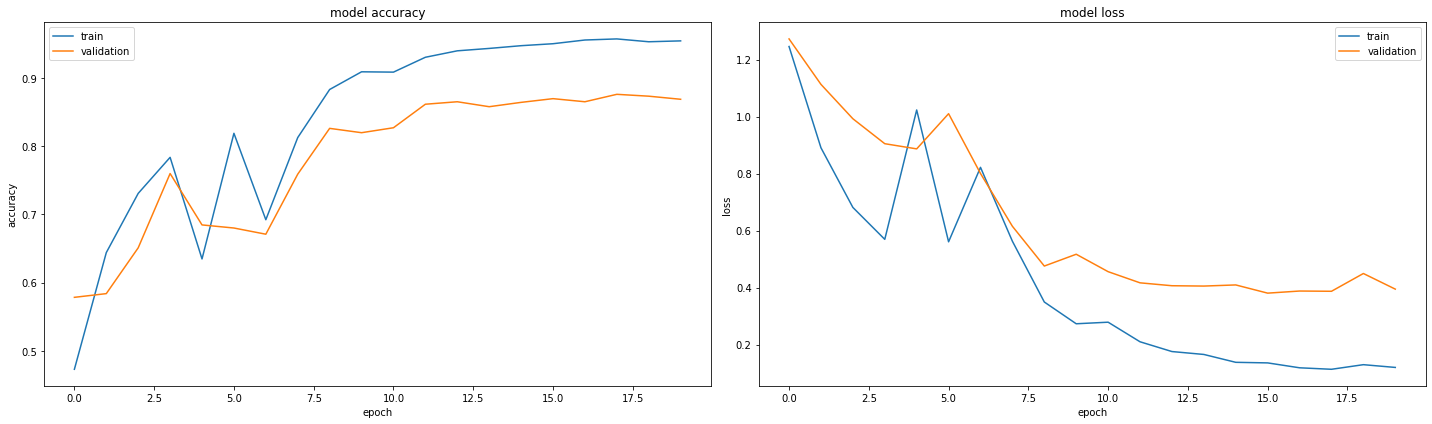

In [53]:
plot(history)

# C. Peephole LSTM

Now we investigate the LSTM with Peephole. To construct PeepholeLSTM, we will need to use PeepholeLSTMCell and build an RNN with that cell. 

#### Task 5. Complete the code below to train, test and visualise the learning process of PeepholeLSTM.

In [56]:
from tensorflow.keras.experimental import PeepholeLSTMCell
from tensorflow.keras.layers import RNN

# Define the Keras model
model = Sequential()
peephole_cell = PeepholeLSTMCell(175)
# Create a layer composed sequentially of the peephole LSTM cells.
PeepholeLayer = RNN(peephole_cell,input_shape=(128, 9))

model.add(PeepholeLayer)
model.add(Dense(6, activation='softmax'))

additional_metrics = ['accuracy']
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=additional_metrics)

model.build()

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn_7 (RNN)                 (None, 175)               130025    
                                                                 
 dense_16 (Dense)            (None, 6)                 1056      
                                                                 
Total params: 131,081
Trainable params: 131,081
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `tf.keras.experimental.PeepholeLSTMCell` is deprecated and will be removed in a future version. Please use tensorflow_addons.rnn.PeepholeLSTMCell instead.
  


In [57]:
history = model.fit(X_train, y_train_onehot, batch_size=128, epochs=20,
                    validation_split=0.15, verbose=1)

test_result = model.evaluate(X_test, y_test_onehot)

print(f'Test result - Loss: {test_result[0]} - Accuracy: {100*test_result[1]}%')

Epoch 1/20
49/49 [==============================] - 35s 670ms/step - loss: 1.2631 - accuracy: 0.4886 - val_loss: 1.2817 - val_accuracy: 0.4959
Epoch 2/20
49/49 [==============================] - 32s 661ms/step - loss: 1.1290 - accuracy: 0.5519 - val_loss: 1.1014 - val_accuracy: 0.6038
Epoch 3/20
49/49 [==============================] - 32s 665ms/step - loss: 0.7506 - accuracy: 0.7163 - val_loss: 0.8852 - val_accuracy: 0.6818
Epoch 4/20
49/49 [==============================] - 32s 659ms/step - loss: 0.5899 - accuracy: 0.8004 - val_loss: 0.8001 - val_accuracy: 0.7144
Epoch 5/20
49/49 [==============================] - 32s 658ms/step - loss: 0.4662 - accuracy: 0.8384 - val_loss: 0.7714 - val_accuracy: 0.7307
Epoch 6/20
49/49 [==============================] - 31s 637ms/step - loss: 0.4134 - accuracy: 0.8557 - val_loss: 0.7185 - val_accuracy: 0.7597
Epoch 7/20
49/49 [==============================] - 33s 668ms/step - loss: 0.4202 - accuracy: 0.8547 - val_loss: 0.6033 - val_accuracy: 0.7924

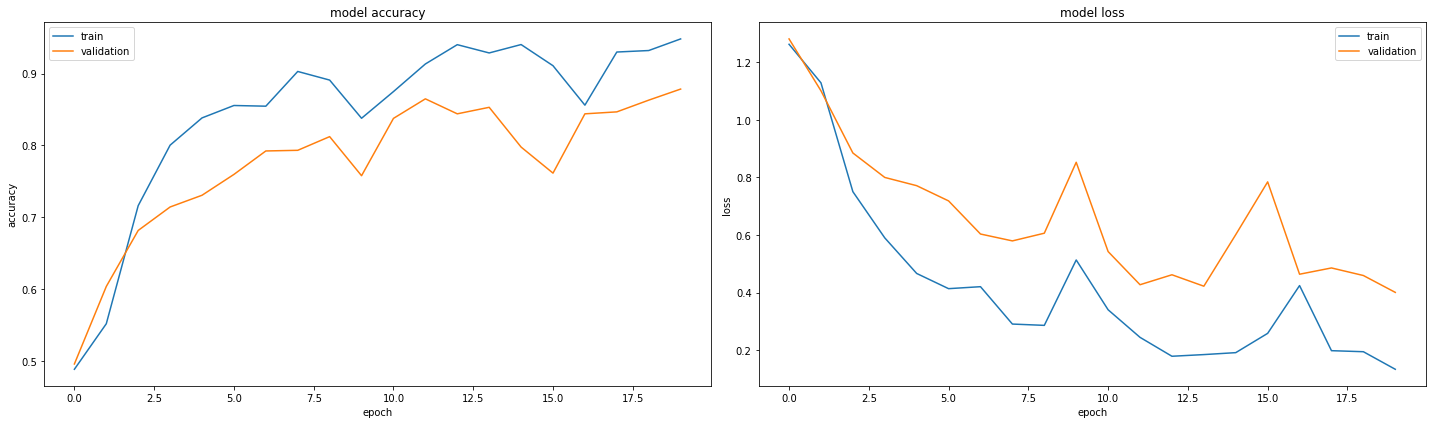

In [58]:
plot(history)

# D. GRU

Using GRU is almost similar as using LSTM (we don't need to define cell to be used with RNN).

#### Task 6: Complete the code below to train, test and visualise the learning process of GRU.

In [70]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define the Keras model
model = Sequential()
model.add(GRU(175, input_shape=(X_train.shape[1], X_train.shape[2]))) # 10 is for 10 hidden units
model.add(Dense(6, activation='softmax'))

additional_metrics = ['accuracy']
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=additional_metrics)

model.build()

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 175)               97650     
                                                                 
 dense_23 (Dense)            (None, 6)                 1056      
                                                                 
Total params: 98,706
Trainable params: 98,706
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = model.fit(X_train, y_train_onehot, batch_size=128, epochs=20,
                    validation_split=0.15, verbose=1)

test_result = model.evaluate(X_test, y_test_onehot)

print(f'Test result - Loss: {test_result[0]} - Accuracy: {100*test_result[1]}%')

Epoch 1/20
49/49 [==============================] - 3s 23ms/step - loss: 1.2960 - accuracy: 0.4526 - val_loss: 1.3697 - val_accuracy: 0.4034
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 1.0106 - accuracy: 0.5655 - val_loss: 1.2017 - val_accuracy: 0.5793
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.8650 - accuracy: 0.6342 - val_loss: 0.9055 - val_accuracy: 0.6210
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.5446 - accuracy: 0.7788 - val_loss: 0.5820 - val_accuracy: 0.8232
Epoch 5/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3384 - accuracy: 0.8688 - val_loss: 0.4611 - val_accuracy: 0.8586
Epoch 6/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2435 - accuracy: 0.9078 - val_loss: 0.3992 - val_accuracy: 0.8849
Epoch 7/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1787 - accuracy: 0.9317 - val_loss: 0.3941 - val_accuracy: 0.8667
Epoch 8/20
49

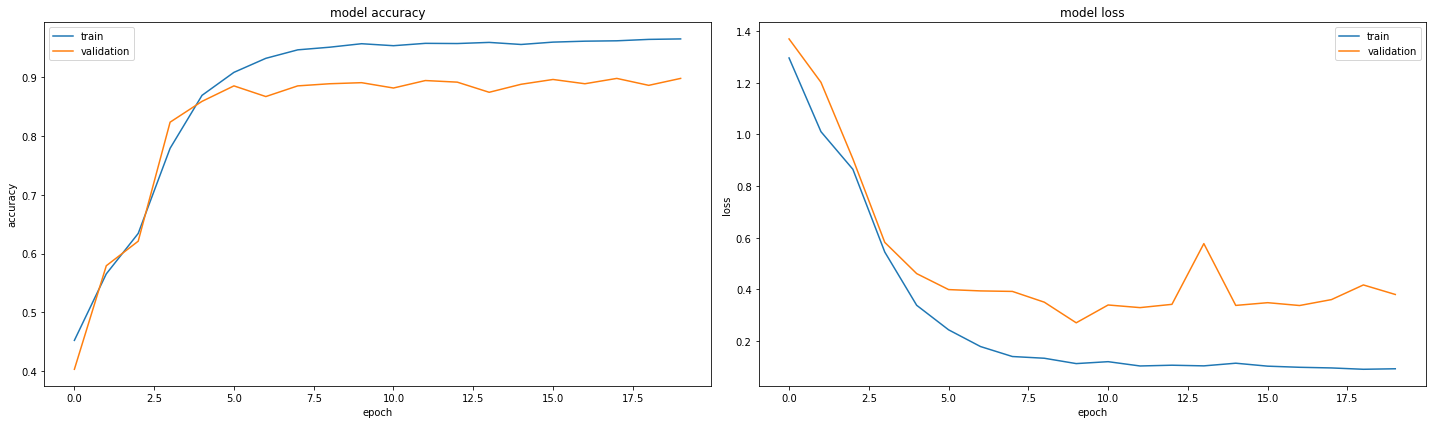

In [72]:
plot(history)

# E. Best results

Find the best model with highest accuracy. List all models and settings you have tried in the box below.

LSTM 175-6 90.40% <br>
Peephole 175-6 88.90% <br>
GRU: 175-6 91.41%